# Definição da Rede Neural Convolucional

Importando bibliotecas


In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

# pequeno hack para fazer o tensorflow funcionar...
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Processamento das imagens

## Um pequeno sumário dos dados

In [22]:
PATH_DATASET = "data/"

train_dir = os.path.join(PATH_DATASET, 'training_set')
validation_dir = os.path.join(PATH_DATASET, 'test_set')

train_bart_dir = os.path.join(train_dir, 'bart')
train_homer_dir = os.path.join(train_dir, 'homer')
validation_bart_dir = os.path.join(validation_dir, 'bart')
validation_homer_dir = os.path.join(validation_dir, 'homer')

num_bart_tr = len(os.listdir(train_bart_dir))
num_homer_tr = len(os.listdir(train_homer_dir))

num_bart_val = len(os.listdir(validation_bart_dir))
num_homer_val = len(os.listdir(validation_homer_dir))

total_train = num_bart_tr + num_homer_tr
total_val = num_bart_val + num_homer_val

print("Um pequeno resumo")
print()
print('Total de imagens de treinamento do Bart:', num_bart_tr)
print('Total de imagens de treinamento do Homer:', num_homer_tr)
print()
print('Total de imagens de validação do Bart:', num_bart_val)
print('Total de imagens de validação do Homer:', num_homer_val)
print()
print("Total de imagens de treinamento:", total_train)
print("Total de imagens de validação:", total_val)


Um pequeno resumo

Total de imagens de treinamento do Bart: 118
Total de imagens de treinamento do Homer: 78

Total de imagens de validação do Bart: 42
Total de imagens de validação do Homer: 31

Total de imagens de treinamento: 196
Total de imagens de validação: 73


## Pré processamento e aumento dos dados

In [4]:
# tamanho do batch e dimensões da imagem
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# geradores de imagens, operação de reescala
train_datagen = ImageDataGenerator(rescale = 1./255)
val_image_gen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

# dados treino com aumento do conjunto de imagems
train_image_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range = 7,
                               horizontal_flip = True,
                               shear_range = 0.2,
                               height_shift_range = 0.05,
                               zoom_range = 0.2)

# processamento dos dados a partir do diretórios de treino e teste
train_data_gen = train_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=IMG_SIZE,
                                                     class_mode='binary')

val_data_gen = val_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 shuffle=True,
                                                 target_size=IMG_SIZE,
                                                 class_mode='binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


## Visualizando algumas imagens de conjunto de dados

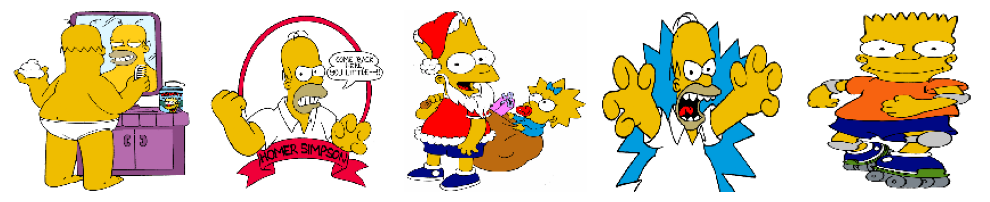

In [5]:
sample_training_images, _ = next(val_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

Definição de funções para visualização do processo de treinamento da rede

In [9]:
def subplots(df, vline=None):
  '''
  Função para plotar gráficos de treino e validação de uma rede neural convolucional.
  '''


  cols_names = df.columns.tolist()
  cases = list(range(len(cols_names[:-1])))
  plot_params = {
      'axes.titlesize': 12,
      'xtick.labelsize': 9,
      'ytick.labelsize': 9,
      }

  with plt.rc_context(plot_params):
    fig, axs = plt.subplots(2, 2, figsize=(8, 4), constrained_layout=True, sharex=True)

    for ax, i in zip(axs.flat, cases):
        ax.set_title(cols_names[:-1][i])
        ax.plot(df['epoch'],  df[cols_names[:-1][i]])
        x = ax.axvline(x=vline, color='#ffb400') if vline != None else False

    fig.text(0.5, -0.05, 'epoch', ha='center')

In [13]:
def compila_treina_visualiza(model):
  '''
  Função para compilar, treinar e visualizar o desempenho de uma rede neural convolucional.
  '''
  steps_per_epoch = train_data_gen.samples // train_data_gen.batch_size
  validation_steps = val_data_gen.samples // val_data_gen.batch_size
  epochs=50

  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

  history = model.fit(
      train_data_gen,
      epochs=epochs,
      steps_per_epoch=steps_per_epoch,
      validation_data=val_data_gen,
      validation_steps=validation_steps,
  )

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  subplots(hist)

  return history

# Definição e treinamento dos modelos

## Modelo 1

Este modelo apresenta a arquitetura exibida na referência de leitura proposta.

Duas camadas de convolução e pooling, seguidas de uma camada de Flattening, uma camada densa e a última camada de classificação.

Todos os modelos serão treinados em 50 épocas e suas acurácias de validação serão comparadas.

Partindo dessa arquitetura, analisaremos o quão pode ser simplificada sem que sua perfomance seja alterada negativamente.

Epoch 1/50
6/6 [==============================] - 2s 325ms/step - loss: 1.4339 - accuracy: 0.5122 - val_loss: 0.6726 - val_accuracy: 0.5781
Epoch 2/50
6/6 [==============================] - 2s 314ms/step - loss: 0.6308 - accuracy: 0.6585 - val_loss: 0.5791 - val_accuracy: 0.7031
Epoch 3/50
6/6 [==============================] - 2s 273ms/step - loss: 0.5785 - accuracy: 0.7195 - val_loss: 0.5449 - val_accuracy: 0.6719
Epoch 4/50
6/6 [==============================] - 2s 286ms/step - loss: 0.5345 - accuracy: 0.6890 - val_loss: 0.4629 - val_accuracy: 0.8438
Epoch 5/50
6/6 [==============================] - 2s 330ms/step - loss: 0.4705 - accuracy: 0.8049 - val_loss: 0.4235 - val_accuracy: 0.7812
Epoch 6/50
6/6 [==============================] - 2s 355ms/step - loss: 0.4811 - accuracy: 0.7500 - val_loss: 0.3983 - val_accuracy: 0.8281
Epoch 7/50
6/6 [==============================] - 2s 343ms/step - loss: 0.4981 - accuracy: 0.7317 - val_loss: 0.4773 - val_accuracy: 0.7188
Epoch 8/50
6/6 [====

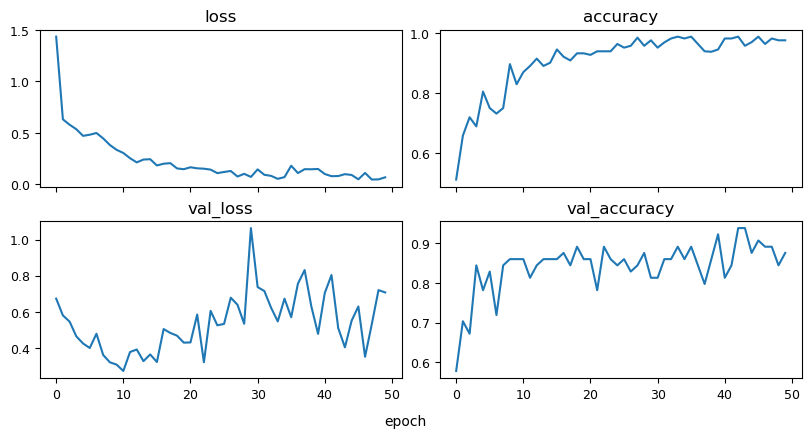

In [14]:
model = keras.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

history = compila_treina_visualiza(model)

Ao final do treinamento do primeiro modelo, obtemos uma acurácia de validação de aproximadamente 87%, enquanto a acurácia de treinamento é de aproximadamente 98%.

É importante observar que o modelo apresenta potencialmente um overfitting, pois a acurácia de treinamento é muito superior à de validação.

Observamos que o loss de treinamento é muito menor que o de validação, o que também indica um overfitting.

Ao longo das épocas, não é possível observar uma melhora no loss de validação, nem na acurácia de validação, o que indica, potencialmente, que o modelo não está aprendendo mais.

## Modelo 2

Nessa arquitetura, notamos a presença da normalização em batch, que é uma técnica de regularização que normaliza os valores de entrada de cada camada, de forma que a média seja próxima de 0 e o desvio padrão próximo de 1.

Além disso, ocorre a repetição tripla de camadas de convolução e pooling, o que aumenta a complexidade do modelo.

As duas camadas densas contam com 512 neurônios cada. São responsáveis por aprender os padrões de classificação.

Já a camada de dropout é responsável por zerar aleatoriamente alguns neurônios, o que ajuda a evitar o overfitting.

Epoch 1/50
6/6 [==============================] - 3s 392ms/step - loss: 4.5067 - accuracy: 0.5610 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 2/50
6/6 [==============================] - 2s 299ms/step - loss: 0.7088 - accuracy: 0.5549 - val_loss: 0.6879 - val_accuracy: 0.6250
Epoch 3/50
6/6 [==============================] - 2s 302ms/step - loss: 0.6424 - accuracy: 0.6829 - val_loss: 0.6827 - val_accuracy: 0.5781
Epoch 4/50
6/6 [==============================] - 2s 292ms/step - loss: 0.6572 - accuracy: 0.5915 - val_loss: 0.6890 - val_accuracy: 0.5938
Epoch 5/50
6/6 [==============================] - 2s 329ms/step - loss: 0.5960 - accuracy: 0.6927 - val_loss: 0.6904 - val_accuracy: 0.7500
Epoch 6/50
6/6 [==============================] - 2s 336ms/step - loss: 0.5487 - accuracy: 0.7292 - val_loss: 0.6860 - val_accuracy: 0.6406
Epoch 7/50
6/6 [==============================] - 2s 333ms/step - loss: 0.4937 - accuracy: 0.7708 - val_loss: 0.6820 - val_accuracy: 0.4688
Epoch 8/50
6/6 [====

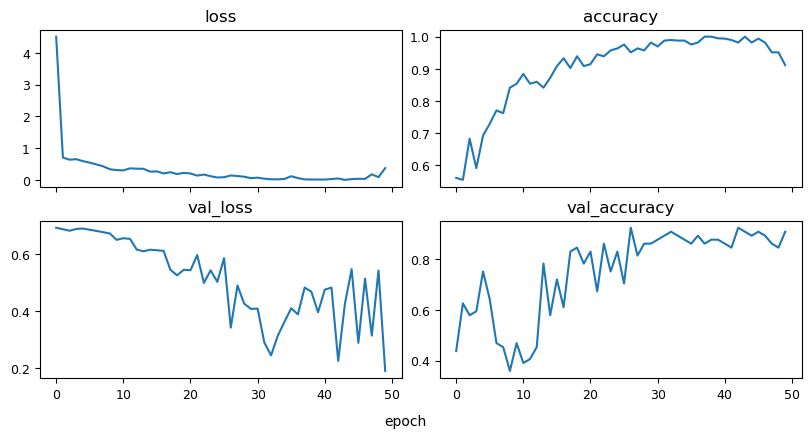

In [15]:
model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

compila_treina_visualiza(model)

Ao final do treinamento do segundo modelo, obtemos uma acurácia de validação de aproximadamente 90%, enquanto a acurácia de treinamento é de aproximadamente 91%.

Pela proximidade das acurácias de treinamento e validação, podemos inferir que o modelo não apresenta overfitting significativo.

O loss de validação é menor que o de treinamento, o que indica que o modelo está aprendendo. Além disso, ao longo das épocas, é possível observar uma melhora no loss de validação, bem como na acurácia de validação, o que também aponta para a continuidade do aprendizado.

Cabe ressaltar a complexidade do modelo, (comparado ao primeiro) que apresenta 3 camadas de convolução e pooling, seguidas de uma camada de Flattening, duas camadas densas e a última camada de classificação.

## Modelo 3

Esse modelo é uma simplificação do primeiro.

Ao invés de duas camadas de convolução e pooling, temos apenas uma.

Conservamos a camada de Flattening, uma camada densa e a última camada de classificação.

Epoch 1/50
6/6 [==============================] - 3s 388ms/step - loss: 5.4030 - accuracy: 0.5854 - val_loss: 2.8207 - val_accuracy: 0.5938
Epoch 2/50
6/6 [==============================] - 2s 316ms/step - loss: 2.1070 - accuracy: 0.4817 - val_loss: 0.6085 - val_accuracy: 0.7812
Epoch 3/50
6/6 [==============================] - 2s 315ms/step - loss: 0.9308 - accuracy: 0.6585 - val_loss: 0.8962 - val_accuracy: 0.5469
Epoch 4/50
6/6 [==============================] - 2s 338ms/step - loss: 0.6277 - accuracy: 0.6768 - val_loss: 0.4121 - val_accuracy: 0.8125
Epoch 5/50
6/6 [==============================] - 2s 358ms/step - loss: 0.5999 - accuracy: 0.7083 - val_loss: 0.2775 - val_accuracy: 0.8594
Epoch 6/50
6/6 [==============================] - 2s 350ms/step - loss: 0.5279 - accuracy: 0.7344 - val_loss: 0.2838 - val_accuracy: 0.7969
Epoch 7/50
6/6 [==============================] - 2s 309ms/step - loss: 0.4610 - accuracy: 0.7683 - val_loss: 0.4173 - val_accuracy: 0.7500
Epoch 8/50
6/6 [====

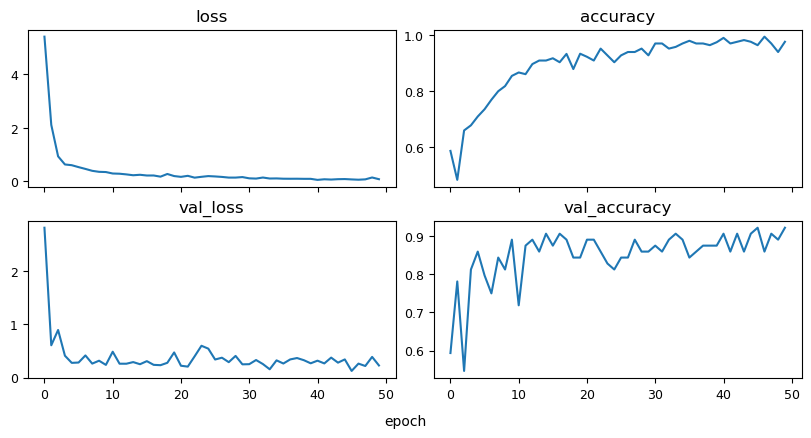

In [16]:
model = keras.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

compila_treina_visualiza(model)

Ao final do treinamento do primeiro modelo, obtemos uma acurácia de validação de aproximadamente 92%, enquanto a acurácia de treinamento é de aproximadamente 98%.

É importante observar que o modelo apresenta potencialmente um overfitting, pois a acurácia de treinamento é muito superior à de validação. Entretanto, a diferença entre as acurácias é menor que no primeiro modelo.

Observamos uma relativa estabilidade do loss de validação, bem como da acurácia de validação, entre as épocas 10 e 20, o que indica que o modelo não está aprendendo mais a partir desse ponto.

Pela sua simplicidade, seus resultados são interessantes se comparados aos primeiros modelos.

## Modelo 4

Esse modelo é uma simplificação do terceiro, diminuindo o número de neurônios da camada densa pela metade.

Simplificar o modelo até o ponto de prejudicar sua perfomance foi um dos objetivos desse trabalho.

Percebemos que mesmo reduzindo a complexidade do modelo significativamente, ainda é possível obter resultados semelhantes, a um custo computacional menor.

Epoch 1/50
6/6 [==============================] - 3s 373ms/step - loss: 7.9417 - accuracy: 0.5488 - val_loss: 1.8710 - val_accuracy: 0.5938
Epoch 2/50
6/6 [==============================] - 2s 306ms/step - loss: 1.0260 - accuracy: 0.6220 - val_loss: 0.3534 - val_accuracy: 0.8594
Epoch 3/50
6/6 [==============================] - 2s 299ms/step - loss: 0.5642 - accuracy: 0.6707 - val_loss: 0.7196 - val_accuracy: 0.6250
Epoch 4/50
6/6 [==============================] - 2s 353ms/step - loss: 0.5924 - accuracy: 0.6890 - val_loss: 0.4020 - val_accuracy: 0.7969
Epoch 5/50
6/6 [==============================] - 2s 347ms/step - loss: 0.4919 - accuracy: 0.7604 - val_loss: 0.3346 - val_accuracy: 0.8438
Epoch 6/50
6/6 [==============================] - 2s 298ms/step - loss: 0.4807 - accuracy: 0.7378 - val_loss: 0.2786 - val_accuracy: 0.8750
Epoch 7/50
6/6 [==============================] - 2s 344ms/step - loss: 0.4221 - accuracy: 0.7552 - val_loss: 0.4279 - val_accuracy: 0.7500
Epoch 8/50
6/6 [====

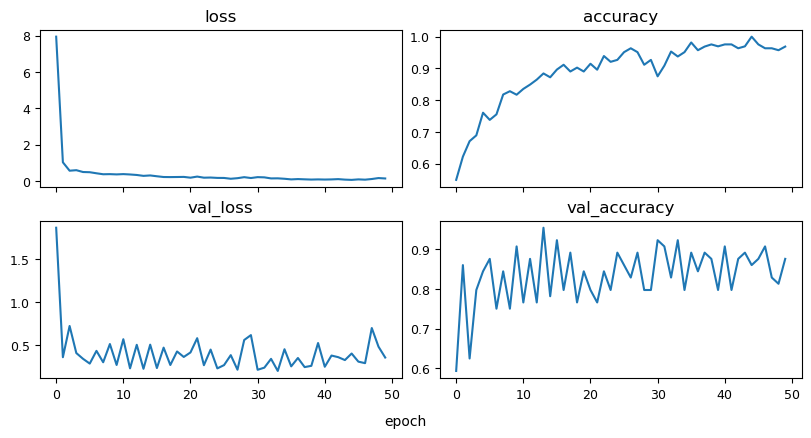

In [17]:
model = keras.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

compila_treina_visualiza(model)

Nesse modelo, obtemos uma acurácia de validação de aproximadamente 87%, enquanto a acurácia de treinamento é de aproximadamente 97%.

É importante observar que o modelo apresenta potencialmente um overfitting, pois a acurácia de treinamento é muito superior à de validação.

Observamos também maior instabilidade de convergência das funções de loss e de acurácia de validação.